In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

In [2]:
techniques = ['isvd', 'knn', 'mean', 'median', 'zero']
result_path = '../../imputed_kernels_results'


def get_dataframe(metric: str, percentage: str):
        cols = []
        for technique in techniques:
                cols.append(f'{technique}-{percentage}')


        result = pd.DataFrame(columns=cols)


        for fold in range(10):
                new_row = []
                
                for technique in techniques:
                        f1_score = np.loadtxt(f'{result_path}/{technique}/{percentage}/{metric}.txt')
                        new_row.append(f1_score[fold])
                
                result.loc[fold] = new_row
    
        return result

<h1>Metric: F1_score, Percentage: 50</h1>

In [3]:
data = get_dataframe('F1_score', '50')
data

,isvd-50,knn-50,mean-50,median-50,zero-50
0,0.607798,0.552954,0.578588,0.568129,0.465066
1,0.613303,0.587983,0.577778,0.573643,0.501027
2,0.602837,0.575221,0.600000,0.594966,0.529843
3,0.603325,0.525253,0.570115,0.560641,0.512821
4,0.589651,0.572077,0.563743,0.570431,0.503627
5,0.585648,0.538293,0.575964,0.595696,0.509606
6,0.595294,0.550790,0.594533,0.580571,0.529718
7,0.609481,0.576052,0.617230,0.607261,0.534553
8,0.580402,0.519722,0.572127,0.557214,0.517699
9,0.591284,0.553633,0.578704,0.572422,0.470085


In [4]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
           meanrank      mean       std  ci_lower  ci_upper effect_size  \
zero-50         5.0  0.507404  0.023849  0.495557  0.519252         0.0   
knn-50          3.6  0.555198  0.022763  0.543351  0.567045   -2.050131   
median-50       2.9  0.578097  0.016337   0.56625  0.589945   -3.458452   
mean-50         2.3  0.582878  0.016205  0.571031  0.594725   -3.701837   
isvd-50         1.2  0.597902  0.011046  0.586055   0.60975   -4.869547   

            magnitude  
zero-50    negligible  
knn-50          large  
median-50       large  
mean-50         large  
isvd-50         large  
pvalue=6.549714326929114e-15
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.1736593395471573, 0.6246978044509888, 0.45894569158554077, 0.14230476319789886, 0.7306395173072815]
homoscedastic=True
pval_homogeneity=0.19601472577905965
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.01
num_samples=10
posterior_matrix=
None
decision_matrix=
None
rope=None
r

In [5]:
create_report(result)

The statistical analysis was conducted for 5 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.142). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and failed to reject the null hypothesis (p=0.196) that the data is homoscedastic. Thus, we assume that our data is homoscedastic.
Because we have more than two populations and all populations are normal and homoscedastic, we use repeated measures ANOVA as omnibus test to determine if there are any significant differences between the mean values of the populations. If the results of the ANOVA test are significant, we use the post-hoc Tukey HSD test to infer which differences are significant. We report the mean value (M) and the standard deviation (SD) for each population. Populations are significantly different if their confid

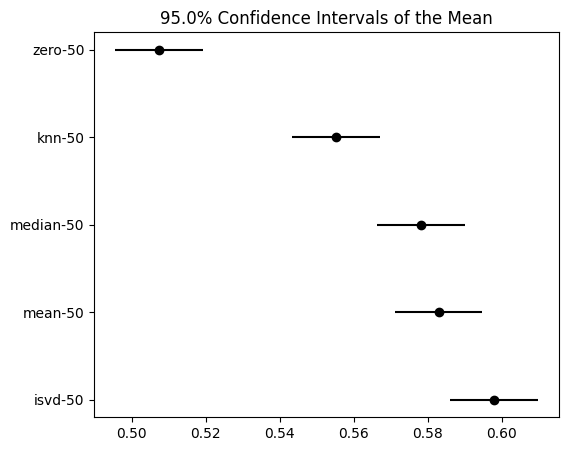

In [6]:
plot_stats(result)
plt.show()

In [7]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrlll}
\toprule
{} &     M &    SD &              CI &    \$d\$ &   Magnitude \\
\midrule
zero-50   & 0.507 & 0.024 &  [0.496, 0.519] &  0.000 &  negligible \\
knn-50    & 0.555 & 0.023 &  [0.543, 0.567] & -2.050 &       large \\
median-50 & 0.578 & 0.016 &  [0.566, 0.590] & -3.458 &       large \\
mean-50   & 0.583 & 0.016 &  [0.571, 0.595] & -3.702 &       large \\
isvd-50   & 0.598 & 0.011 &  [0.586, 0.610] & -4.870 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


/home/victor/.local/lib/python3.9/site-packages/autorank/autorank.py:697: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_string = table_df.to_latex(float_format=float_format, na_rep='-').strip()


<h1>Metric: Pearson correlation, Percentage: 50</h1>

In [8]:
data = get_dataframe('Pearson_correlation', '50')
data

,isvd-50,knn-50,mean-50,median-50,zero-50
0,0.784663,0.657552,0.750772,0.747538,0.564100
1,0.769619,0.631599,0.741686,0.746482,0.545855
2,0.770828,0.668600,0.737113,0.734623,0.589959
3,0.766413,0.628016,0.726703,0.726386,0.562277
4,0.776734,0.654846,0.740546,0.739633,0.562729
5,0.775131,0.637406,0.754356,0.761226,0.568933
6,0.788262,0.697926,0.761974,0.755246,0.605419
7,0.809707,0.675261,0.772929,0.771148,0.615786
8,0.794865,0.664543,0.770515,0.770109,0.600050
9,0.780911,0.673830,0.740243,0.743960,0.536586


In [9]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
           meanrank      mean       std  ci_lower  ci_upper effect_size  \
zero-50         5.0  0.575169  0.026316  0.563129  0.587209         0.0   
knn-50          4.0  0.658958  0.021906  0.646918  0.670998   -3.460638   
median-50       2.7  0.749635  0.014758  0.737595  0.761675   -8.177449   
mean-50         2.3  0.749684  0.015170  0.737644  0.761724   -8.124974   
isvd-50         1.0  0.781713  0.013232  0.769673  0.793753   -9.916436   

            magnitude  
zero-50    negligible  
knn-50          large  
median-50       large  
mean-50         large  
isvd-50         large  
pvalue=8.524920071433879e-31
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.5871083736419678, 0.7366673350334167, 0.8010888695716858, 0.6034201383590698, 0.41823023557662964]
homoscedastic=True
pval_homogeneity=0.18656358970824502
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.01
num_samples=10
posterior_matrix=
None
decision_matrix=
None
rope=None
ro

In [10]:
create_report(result)

The statistical analysis was conducted for 5 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.418). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and failed to reject the null hypothesis (p=0.187) that the data is homoscedastic. Thus, we assume that our data is homoscedastic.
Because we have more than two populations and all populations are normal and homoscedastic, we use repeated measures ANOVA as omnibus test to determine if there are any significant differences between the mean values of the populations. If the results of the ANOVA test are significant, we use the post-hoc Tukey HSD test to infer which differences are significant. We report the mean value (M) and the standard deviation (SD) for each population. Populations are significantly different if their confid

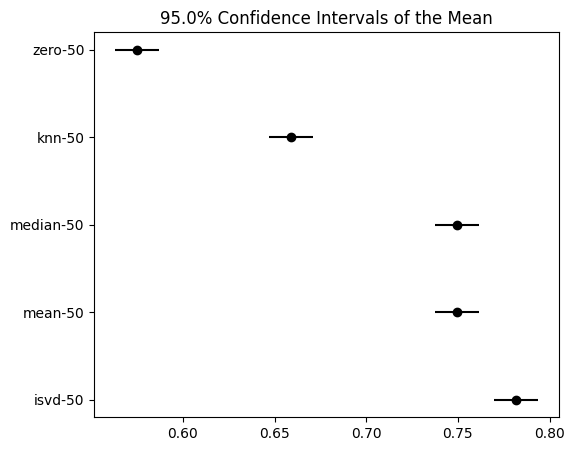

In [11]:
plot_stats(result)
plt.show()

In [12]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrlll}
\toprule
{} &     M &    SD &              CI &    \$d\$ &   Magnitude \\
\midrule
zero-50   & 0.575 & 0.026 &  [0.563, 0.587] &  0.000 &  negligible \\
knn-50    & 0.659 & 0.022 &  [0.647, 0.671] & -3.461 &       large \\
median-50 & 0.750 & 0.015 &  [0.738, 0.762] & -8.177 &       large \\
mean-50   & 0.750 & 0.015 &  [0.738, 0.762] & -8.125 &       large \\
isvd-50   & 0.782 & 0.013 &  [0.770, 0.794] & -9.916 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


/home/victor/.local/lib/python3.9/site-packages/autorank/autorank.py:697: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_string = table_df.to_latex(float_format=float_format, na_rep='-').strip()


<h1>Metric: RMSE, Percentage: 50</h1>

In [13]:
data = get_dataframe('RMSE', '50')
data

,isvd-50,knn-50,mean-50,median-50,zero-50
0,2.129297,2.846436,2.346896,2.371898,3.557744
1,2.151449,2.991118,2.334372,2.321905,3.628998
2,2.143318,2.750701,2.342460,2.352244,3.468851
3,2.129743,2.886467,2.351553,2.348424,3.583087
4,2.084254,2.851724,2.303729,2.304059,3.541906
5,2.111378,2.859036,2.243688,2.214480,3.441333
6,2.120590,2.733962,2.292425,2.327595,3.462815
7,2.074871,2.861613,2.292266,2.300378,3.384980
8,2.097292,2.918031,2.245494,2.238671,3.591181
9,2.150735,2.867653,2.371631,2.346647,3.629738


In [14]:
result = autorank(data, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
           meanrank      mean       std  ci_lower  ci_upper effect_size  \
isvd-50         5.0  2.119293  0.026995   2.09155  2.147035         0.0   
mean-50         3.5  2.312451  0.044341  2.266883   2.35802   -5.262152   
median-50       3.5  2.312630  0.050725  2.260501   2.36476   -4.758382   
knn-50          2.0  2.856674  0.074009  2.780616  2.932732  -13.237317   
zero-50         1.0  3.529063  0.084563  3.442159  3.615968  -22.460074   

            magnitude  
isvd-50    negligible  
mean-50         large  
median-50       large  
knn-50          large  
zero-50         large  
pvalue=1.1205592875074531e-07
cd=1.9288111473713958
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.49023860692977905, 0.16259783506393433, 0.37609046697616577, 0.3318065106868744, 0.4248492419719696]
homoscedastic=False
pval_homogeneity=0.016685560363856
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.01
num_samples=10
posterior_matrix=
None
decision_matrix=

In [15]:
create_report(result)

The statistical analysis was conducted for 5 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.163). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and reject the null hypothesis (p=0.017) that thedata is homoscedastic. Thus, we assume that our data is heteroscedastic.
Because we have more than two populations and the populations are normal but heteroscedastic, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the mean values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the mean value (M), the standard deviation (SD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference

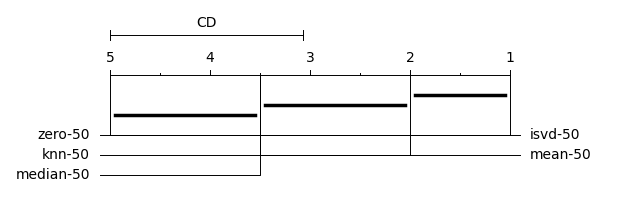

In [16]:
plot_stats(result)
plt.show()

In [17]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrrrlll}
\toprule
{} &    MR &     M &    SD &              CI &     \$d\$ &   Magnitude \\
\midrule
isvd-50   & 5.000 & 2.119 & 0.027 &  [2.092, 2.147] &   0.000 &  negligible \\
mean-50   & 3.500 & 2.312 & 0.044 &  [2.267, 2.358] &  -5.262 &       large \\
median-50 & 3.500 & 2.313 & 0.051 &  [2.261, 2.365] &  -4.758 &       large \\
knn-50    & 2.000 & 2.857 & 0.074 &  [2.781, 2.933] & -13.237 &       large \\
zero-50   & 1.000 & 3.529 & 0.085 &  [3.442, 3.616] & -22.460 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


/home/victor/.local/lib/python3.9/site-packages/autorank/autorank.py:697: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_string = table_df.to_latex(float_format=float_format, na_rep='-').strip()
